In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.nn import functional as F

# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

# Define sentiment labels
sentiment_labels = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}

def predict_sentiment(text):
    # Tokenize the text and convert to tensor
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True)

    # Forward pass through the model
    outputs = model(**inputs)

    # Get predicted logits and softmax probabilities
    logits = outputs.logits
    probabilities = F.softmax(logits, dim=1)

    # Get predicted sentiment label
    predicted_label = torch.argmax(probabilities, dim=1).item()
    predicted_sentiment = sentiment_labels[predicted_label]

    return predicted_sentiment, probabilities

# Example usage
text = "I really enjoyed the movie, it was fantastic!"
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.nn import functional as F

# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

# Define sentiment labels
sentiment_labels = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}

def predict_sentiment(text):
    # Tokenize the text and convert to tensor
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True)

    # Forward pass through the model
    outputs = model(**inputs)

    # Get predicted logits and softmax probabilities
    logits = outputs.logits
    probabilities = F.softmax(logits, dim=1)

    # Get predicted sentiment label
    predicted_label = torch.argmax(probabilities, dim=1).item()
    predicted_sentiment = sentiment_labels[predicted_label]

    return predicted_sentiment, probabilities

# Example usage
text = "I really enjoyed the movie, it was fantastic!"
sentiment, probabilities = predict_sentiment(text)
print(f"Predicted Sentiment: {sentiment}")
print("Probabilities:", probabilities)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Predicted Sentiment: Negative
Probabilities: tensor([[0.5507, 0.4493]], grad_fn=<SoftmaxBackward0>)


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.nn import functional as F

# Load pre-trained sentiment analysis model and tokenizer
model_name = 'nlptown/bert-base-multilingual-uncased-sentiment'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Map stars to sentiment
def map_stars_to_sentiment(star_rating):
    if star_rating <= 2:
        return 'Negative'
    elif star_rating == 3:
        return 'Neutral'
    else:
        return 'Positive'

def predict_sentiment(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    outputs = model(**inputs)
    logits = outputs.logits
    probabilities = F.softmax(logits, dim=1)

    predicted_rating = torch.argmax(probabilities, dim=1).item() + 1  # Ratings are 1-5
    sentiment = map_stars_to_sentiment(predicted_rating)

    return sentiment, probabilities

# Example usage
text = "I really enjoyed the movie, it was fantastic!"
sentiment, probabilities = predict_sentiment(text)
print(f"Predicted Sentiment: {sentiment}")
print("Probabilities:", probabilities)


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

Predicted Sentiment: Positive
Probabilities: tensor([[0.0016, 0.0018, 0.0209, 0.2704, 0.7053]], grad_fn=<SoftmaxBackward0>)


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.nn import functional as F

# Load pre-trained sentiment analysis model and tokenizer
model_name = 'nlptown/bert-base-multilingual-uncased-sentiment'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Map stars to sentiment
def map_stars_to_sentiment(star_rating):
    if star_rating <= 2:
        return 'Negative'
    elif star_rating == 3:
        return 'Neutral'
    else:
        return 'Positive'

def predict_sentiment(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    outputs = model(**inputs)
    logits = outputs.logits
    probabilities = F.softmax(logits, dim=1)

    predicted_rating = torch.argmax(probabilities, dim=1).item() + 1  # Ratings are 1-5
    sentiment = map_stars_to_sentiment(predicted_rating)

    return sentiment, probabilities

# Take user input
user_text = input("Enter a sentence to analyze sentiment: ")
sentiment, probabilities = predict_sentiment(user_text)
print(f"\nPredicted Sentiment: {sentiment}")
print("Probabilities:", probabilities)


Enter a sentence to analyze sentiment: my name is aaryan i am from aktau

Predicted Sentiment: Positive
Probabilities: tensor([[0.2016, 0.1469, 0.1997, 0.1919, 0.2600]], grad_fn=<SoftmaxBackward0>)


Enter a sentence to analyze sentiment: i like managment part


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.



Predicted Sentiment: Positive


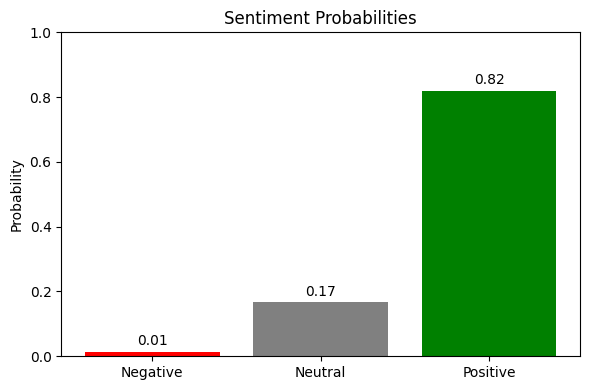

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from torch.nn import functional as F
import matplotlib.pyplot as plt

# Load model and tokenizer
model_name = 'cardiffnlp/twitter-roberta-base-sentiment'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Sentiment labels
sentiment_labels = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}

def predict_sentiment(text):
    # Tokenize and encode input
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)

    # Get model outputs
    outputs = model(**inputs)
    logits = outputs.logits
    probabilities = F.softmax(logits, dim=1)

    # Get predicted sentiment
    predicted_label = torch.argmax(probabilities, dim=1).item()
    predicted_sentiment = sentiment_labels[predicted_label]

    return predicted_sentiment, probabilities

def plot_sentiment(probabilities):
    labels = [sentiment_labels[i] for i in range(len(probabilities[0]))]
    scores = probabilities[0].tolist()

    plt.figure(figsize=(6, 4))
    bars = plt.bar(labels, scores, color=['red', 'gray', 'green'])
    plt.ylim(0, 1)
    plt.title('Sentiment Probabilities')
    plt.ylabel('Probability')

    # Show value labels on bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.02, f'{yval:.2f}', ha='center', fontsize=10)

    plt.tight_layout()
    plt.show()

# User input
user_text = input("Enter a sentence to analyze sentiment: ")

# Predict and visualize
sentiment, probabilities = predict_sentiment(user_text)
print(f"\nPredicted Sentiment: {sentiment}")
plot_sentiment(probabilities)